In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import scipy.stats as stats

In [7]:
warnings.filterwarnings('ignore')

---

## Initial Analysis
### Import

In [8]:
# Import DataFrame
df_hob = pd.read_csv('data/df_periodic.csv', index_col=0)
df_hob.head()

,ITEM ID,FAMILY,STORE,DAY 1,DAY 2,DAY 3,DAY 4,DAY 5,DAY 6,DAY 7,...,DAY 356,DAY 357,DAY 358,DAY 359,DAY 360,DAY 361,DAY 362,DAY 363,DAY 364,DAY 365
0,STORE_1-FOOD_GROCERY_002,FOOD_GROCERY,STORE_1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,STORE_1-FOOD_GROCERY_004,FOOD_GROCERY,STORE_1,0,0,0,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
2,STORE_1-FOOD_GROCERY_005,FOOD_GROCERY,STORE_1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,STORE_1-FOOD_GROCERY_008,FOOD_GROCERY,STORE_1,12,15,0,0,0,4,6,...,7,4,20,26,0,9,14,0,8,18
4,STORE_1-FOOD_GROCERY_009,FOOD_GROCERY,STORE_1,2,0,7,3,0,2,3,...,16,0,1,0,0,1,0,0,3,0


### Plot Volumes per items

2,294 Items volumes


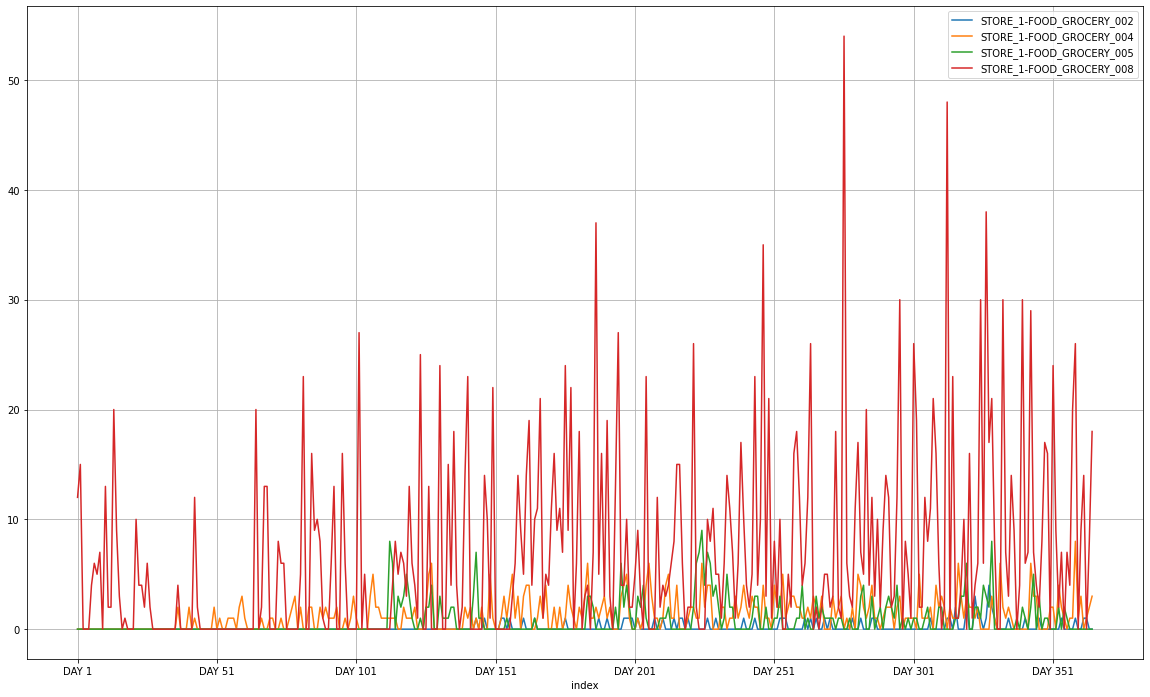

In [9]:
# Hobbies
print("{:,} Items volumes".format(len(df_hob)))
COLS_DATE = ['DAY {}'.format(i) for i in range(1, 365+1)]
# volumes
df_vol = pd.DataFrame(df_hob[COLS_DATE].T)
df_vol.columns = df_hob['ITEM ID'].values
df_vol.reset_index(inplace = True)
# replacing index
df_vol['index'] = df_vol['index'].apply(lambda t: t.replace('d_', ''))

ax = plt.gca()
df_vol[df_vol.columns[0:5]].plot(figsize=(20, 12), x='index', ax=ax, grid = True)
plt.show()

---

## Replenishment Rules
### SKU: STORE_1-FOOD_GROCERY_009 (s,Q)with actual demand

In [10]:
df_sim = pd.DataFrame({'time': np.array(range(1, 365+1))})

# Item selection
SKU_n = df_hob['ITEM ID'].nunique()
SKU = df_hob['ITEM ID'].unique()
SKU_x = SKU[4]
print("SKU: {}".format(SKU_x))
# Demand Function
df_sim['demand'] = np.array(df_vol[SKU[4]].values)
# Average Daily Demand
D_day = math.ceil(df_sim['demand'].mean())
print("Daily Demand: {:,} units".format(D_day))
# Standard Deviation
sigma = df_sim['demand'].std()
# Lead Time
LD = 2

# Replenishment = 5 x Q_Daily
Q = 5 * D_day

# Service Level
CSL = 0.95
# Average during lead time period
mu_ld = math.floor(D_day * LD)
print("Average demand during lead time: {:,} units".format(mu_ld))
# Standard deviation 
sigma_ld = sigma * math.sqrt(LD)
print("Standard deviation during lead time: {:,} units".format(math.floor(sigma_ld)))
# Level of Service to fix k
k = 3
print("k = {:,}".format(round(k, 2)))
# Reorder Point
s = mu_ld + k * sigma_ld
print("Reorder point: s = {:,} units".format(s))

SKU: STORE_1-FOOD_GROCERY_009
Daily Demand: 2 units
Average demand during lead time: 4 units
Standard deviation during lead time: 3 units
k = 3
Reorder point: s = 14.549806604333089 units


###  For each SKU: R, S with actual demand

In [11]:
# R = 10
R = 10
# Item selection
SKU_n = df_hob['ITEM ID'].nunique()
SKU = df_hob['ITEM ID'].unique()
SKU_x = SKU[4]
print("SKU: {}".format(SKU_x))


# Demand Function
df_sim = pd.DataFrame({'time': np.array(range(1, 365+1))})
df_sim['demand'] = np.array(df_vol[SKU_x].values)
# Average Daily Demand
D_day = math.ceil(df_sim['demand'].mean())
print("Daily Demand: {:,} units".format(D_day))
# Standard Deviation
sigma = df_sim['demand'].std()
# Lead Time
LD = 2


# Average during lead time period
mu_ld = math.floor(D_day * (LD+R))
print("Average demand during lead time: {:,} units".format(mu_ld))
# Standard deviation 
sigma_ld = sigma * math.sqrt(LD+R)
print("Standard deviation during lead time: {:,} units".format(math.floor(sigma_ld)))
# Level of Service to fix k
k = 1
print("k = {:,}".format(round(k, 2)))
# Reorder Point
S = mu_ld + k * sigma_ld
print("Order Up to Level: S = {:,} (units)".format(S))

SKU: STORE_1-FOOD_GROCERY_009
Daily Demand: 2 units
Average demand during lead time: 24 units
Standard deviation during lead time: 8 units
k = 1
Order Up to Level: S = 32.61388102188671 (units)
